In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive
import pandas as pd
import tensorflow as tf
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
columns = [
    "external_reference", "operation_id",
    "status", "status_detail", "transaction_amount", "installments",
    "payment_type", "hour_created", "DOW_created", "month_created","shp_Carrier",
    "Shipping", "bill_zipcode", "shp_zipcode", "fraud_flag","customer_ID"
]


In [ ]:
path1='/content/drive/MyDrive/Proyecto_Final_BC/Whole_Collection.csv'
df=pd.read_csv(path1)[:-2]
df = df.loc[:, columns].copy()

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,external_reference,operation_id,status,status_detail,transaction_amount,installments,payment_type,hour_created,DOW_created,month_created,shp_Carrier,Shipping,bill_zipcode,shp_zipcode,fraud_flag,customer_ID
0,375285,22439390268,approved,accredited,4549.0,1,debit_card,17,1,5,DHL,139,88660,88660,No,2383
1,375284,22439310665,approved,accredited,4549.0,1,debit_card,17,1,5,DHL,139,88660,88660,No,2383
2,375213,22433076416,rejected,cc_rejected_high_risk,6378.0,3,credit_card,13,1,5,DHL,139,89350,89350,No,2811
3,375217,22433120457,rejected,cc_rejected_high_risk,6378.0,1,credit_card,13,1,5,DHL,139,89350,89350,No,2811
4,375235,22435577370,approved,accredited,6689.0,9,credit_card,15,1,5,FederalExpress,0,55067,55067,No,4291


In [ ]:
df.columns

Index(['external_reference', 'operation_id', 'status', 'status_detail',
       'transaction_amount', 'installments', 'payment_type', 'hour_created',
       'DOW_created', 'month_created', 'shp_Carrier', 'Shipping',
       'bill_zipcode', 'shp_zipcode', 'fraud_flag', 'customer_ID'],
      dtype='object')

In [ ]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_cat].nunique()

status            6
status_detail    23
payment_type      7
shp_Carrier       4
fraud_flag        2
dtype: int64

In [ ]:
# Look at date_created value counts for binning
status_detail_counts= df.status_detail.value_counts()
status_detail_counts

accredited                              9556
cc_rejected_high_risk                   4825
cc_rejected_other_reason                1449
cc_rejected_insufficient_amount         1186
rejected_high_risk                       434
cc_rejected_call_for_authorize           417
expired                                  395
cc_rejected_blacklist                    305
rejected_other_reason                    210
reimbursed                               183
refunded                                 168
by_payer                                 128
bpp_refunded                              77
cc_rejected_bad_filled_date               75
by_admin                                  71
cc_rejected_bad_filled_card_number        67
settled                                   24
cc_rejected_bad_filled_security_code      16
pending_waiting_payment                   15
cc_amount_rate_limit_exceeded             12
partially_refunded                         4
cc_rejected_card_disabled                  3
cc_rejecte

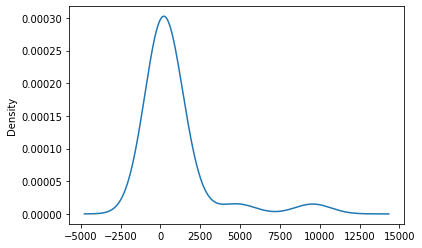

In [ ]:
# Visualize the value counts of date_created
status_detail_counts.plot.density()

In [ ]:
# Determine which values to replace if counts are less than ...?
replace_status_detail = list(status_detail_counts[status_detail_counts <1000].index)

# Replace in dataframe
for std in replace_status_detail:
    df.status_detail = df.status_detail.replace(std, "Other")

# Check to make sure binning was successful
df.status_detail.value_counts()

accredited                         9556
cc_rejected_high_risk              4825
Other                              2606
cc_rejected_other_reason           1449
cc_rejected_insufficient_amount    1186
Name: status_detail, dtype: int64

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,status_approved,status_cancelled,status_charged_back,status_pending,status_refunded,status_rejected,status_detail_Other,status_detail_accredited,status_detail_cc_rejected_high_risk,status_detail_cc_rejected_insufficient_amount,...,payment_type_debit_card,payment_type_digital_currency,payment_type_digital_wallet,payment_type_ticket,shp_Carrier_99Minutos,shp_Carrier_DHL,shp_Carrier_Estafeta,shp_Carrier_FederalExpress,fraud_flag_No,fraud_flag_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,external_reference,operation_id,transaction_amount,installments,hour_created,DOW_created,month_created,Shipping,bill_zipcode,shp_zipcode,...,payment_type_debit_card,payment_type_digital_currency,payment_type_digital_wallet,payment_type_ticket,shp_Carrier_99Minutos,shp_Carrier_DHL,shp_Carrier_Estafeta,shp_Carrier_FederalExpress,fraud_flag_No,fraud_flag_Yes
0,375285,22439390268,4549.0,1,17,1,5,139,88660,88660,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,375284,22439310665,4549.0,1,17,1,5,139,88660,88660,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,375213,22433076416,6378.0,3,13,1,5,139,89350,89350,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,375217,22433120457,6378.0,1,13,1,5,139,89350,89350,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,375235,22435577370,6689.0,9,15,1,5,0,55067,55067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Remove loan status target from features data
X = df.drop(columns=["fraud_flag_No","fraud_flag_Yes"],axis=1)
#X = pd.get_dummies(X)

#y = df[["fraud_flag_No","fraud_flag_Yes"]]
y = df[["fraud_flag_Yes"]]


# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
len(X_train_scaled)

14716

In [ ]:
len(y_train)

14716

In [ ]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


 Random forest predictive accuracy: 0.996


In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)


In [ ]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4823,0
Actual 1,22,61


Accuracy Score : 0.9955156950672646
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4823
         1.0       1.00      0.73      0.85        83

    accuracy                           1.00      4906
   macro avg       1.00      0.87      0.92      4906
weighted avg       1.00      1.00      1.00      4906



In [ ]:
#¿Fraud or not fraud? Focus on true positives and false negatives. 
#4823 were predicted to be good, true positivies.
#0 were predicted to be bad, false negatives.
#22 were predicted to be good and are considered false positive.
#61 were predicted to be bad, and true negatives.

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


460/460 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.8686
Epoch 2/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0448 - accuracy: 0.9947
Epoch 3/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9950
Epoch 4/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0216 - accuracy: 0.9954
Epoch 5/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.9954
Epoch 6/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9954
Epoch 7/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9954
Epoch 8/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0188 - accuracy: 0.9954
Epoch 9/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0184 - accuracy: 0.9954
Epoch 10/50
460/460 [==============================] - 1s 2ms/step - loss: 0.0182 - accuracy: 0.9952
Epoch 11/5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


154/154 - 0s - loss: 0.0225 - accuracy: 0.9939 - 319ms/epoch - 2ms/step
Loss: 0.022479619830846786, Accuracy: 0.9938850402832031
